# Research Question 3

How are the countries connected? Is there a pattern in the
way players in origin countries select special countries for
their offshores?

*For every combination of two countries that occur in the data
we count the number of offshores founded in one country
coming from the other country and vice versa.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Reading the data

In [2]:
entities = r'./panama_csv/Entities.csv'
entities = pd.read_csv(entities,index_col='name', header=0, low_memory=False)
entities=entities.rename(columns = {'countries':'Country'})

In [3]:
entities.head()

,original_name,former_name,jurisdiction,jurisdiction_description,company_type,address,internal_id,incorporation_date,inactivation_date,struck_off_date,dorm_date,status,service_provider,ibcRUC,country_codes,Country,note,valid_until,node_id,sourceID
name,,,,,,,,,,,,,,,,,,,,
"TIANSHENG INDUSTRY AND TRADING CO., LTD.","TIANSHENG INDUSTRY AND TRADING CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001256.0,23-MAR-2006,18-FEB-2013,15-FEB-2013,NaN,Defaulted,Mossack Fonseca,25221,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000001,Panama Papers
"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.","NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001263.0,27-MAR-2006,27-FEB-2014,15-FEB-2014,NaN,Defaulted,Mossack Fonseca,25249,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000002,Panama Papers
"HOTFOCUS CO., LTD.","HOTFOCUS CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1000896.0,10-JAN-2006,15-FEB-2012,15-FEB-2012,NaN,Defaulted,Mossack Fonseca,24138,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000003,Panama Papers
"SKY-BLUE GIFTS & TOYS CO., LTD.","SKY-BLUE GIFTS & TOYS CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1000914.0,06-JAN-2006,16-FEB-2009,15-FEB-2009,NaN,Defaulted,Mossack Fonseca,24012,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000004,Panama Papers
FORTUNEMAKER INVESTMENTS CORPORATION,FORTUNEMAKER INVESTMENTS CORPORATION,NaN,SAM,Samoa,NaN,LOYAL PORT LIMITED 8/F; CRAWFORD TOWER 99 JERV...,1001266.0,19-APR-2006,15-MAY-2009,15-FEB-2008,NaN,Changed agent,Mossack Fonseca,R25638,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000005,Panama Papers


Observation: The origin country can be found in the column "Country", the goal tax heaven in the column "jurisdiction_descrition". Let's take a look at which countries are observed:

## Cleaning the data

When we inspectd the data, we found the coutry values "Not identified", "Undetermined", and "Recorded in leaked files as "fund". All of them can be considered missing, therefore we encode them as NaN. Furthermore, we rename all occurences of "United States Of America" to "United States" in order to have consistent names.

In [4]:
entities.Country.replace('Not identified',np.NaN, inplace=True)
entities.jurisdiction_description.replace(['Undetermined', 'Recorded in leaked files as "fund"'],np.NaN, inplace=True)
entities.jurisdiction_description.replace('United States Of America','United States', inplace=True)

## Computing the cross table of frequencies 

The frequencies of relations between countries can be computed using the pandas function 'crosstab'.

In [5]:
crosstable = pd.crosstab(entities.Country, [entities.jurisdiction_description], rownames=['origin'], colnames=['destination'])
crosstable.tail()

destination,Bahamas,Belize,Bermuda,British Anguilla,British Virgin Islands,Brunei,Cayman,China,Cook Islands,Costa Rica,...,Samoa,Seychelles,Singapore,St. Lucia,Thailand,United Kingdom,United States,Uruguay,Vanuatu,Wyoming
origin,,,,,,,,,,,,,,,,,,,,,
Viet Nam,2,0,0,0,4,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Viet Nam;British Virgin Islands,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zambia,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zimbabwe,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


A closer observation of the country names shoes that sometimes there is more than one origin country. The countries are still specified in one data row and the names are seperated by ";". (See for example Viet Nam;British Virgin Islands.) We decided to count such relations for all of the specified origin countries.

(NB: It would be interesting to analyse also how those countries which occur in combination are related. -- todo)

Therefore, we duplicate those rows and add them for each of the mentioned countries. As this might result in having more than one row per origin country, in the end we group by origin country and sum up all the values. Furthermore, we again drop the row corresponding to the country value "Not identified".

In [6]:
'''
multiple_orig = crosstable.reset_index()[crosstable.reset_index().origin.str.contains(';')]
multiple_orig_split = crosstable.reset_index()[~crosstable.reset_index().origin.str.contains(';')]
for index, row in multiple_orig.iterrows():
    for orig in row['origin'].split(';'):
        multiple_orig_split = multiple_orig_split.append(pd.concat([pd.Series({'origin' : orig}), row[1:]]), ignore_index=True)
multiple_orig_split
'''

multiple_orig = pd.DataFrame(columns = crosstable.reset_index().columns)
for index, row in crosstable.reset_index().iterrows():
    for orig in row['origin'].split(';'):
        multiple_orig = multiple_orig.append(pd.concat([pd.Series({'origin' : orig}), row[1:]]), ignore_index=True)
multiple_orig.head()

destination,origin,Bahamas,Belize,Bermuda,British Anguilla,British Virgin Islands,Brunei,Cayman,China,Cook Islands,...,Samoa,Seychelles,Singapore,St. Lucia,Thailand,United Kingdom,United States,Uruguay,Vanuatu,Wyoming
0,Albania,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Andorra,26,0,0,0,39,0,0,0,0,...,9,72,0,0,0,1,0,15,0,0
3,Angola,0,0,0,0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Anguilla,0,0,0,21,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#multiple_orig_split.set_index('origin', inplace=True)
crosstable = multiple_orig.groupby('origin').sum()
crosstable.drop('Not identified')

destination,Bahamas,Belize,Bermuda,British Anguilla,British Virgin Islands,Brunei,Cayman,China,Cook Islands,Costa Rica,...,Samoa,Seychelles,Singapore,St. Lucia,Thailand,United Kingdom,United States,Uruguay,Vanuatu,Wyoming
origin,,,,,,,,,,,,,,,,,,,,,
Albania,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Andorra,26,0,0,0,39,0,0,0,0,3,...,9,72,0,0,0,1,0,15,0,0
Angola,0,0,0,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Anguilla,0,0,0,21,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Antigua and Barbuda,0,0,0,0,1,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
Argentina,23,0,0,0,83,0,0,0,0,1,...,0,6,0,0,0,0,0,0,0,0
Aruba,0,0,0,4,19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Australia,2,0,0,1,64,0,0,0,1,0,...,0,4,0,0,0,0,0,0,0,0


## Plot

For a first visualization of the data we show a stacked bar plot with one bar per origin country and one bar section per destination country.

(todo: improve by showing only those countries with enough outgoing offshores)

The goal is to visualize the same result using a migration flow diagram.

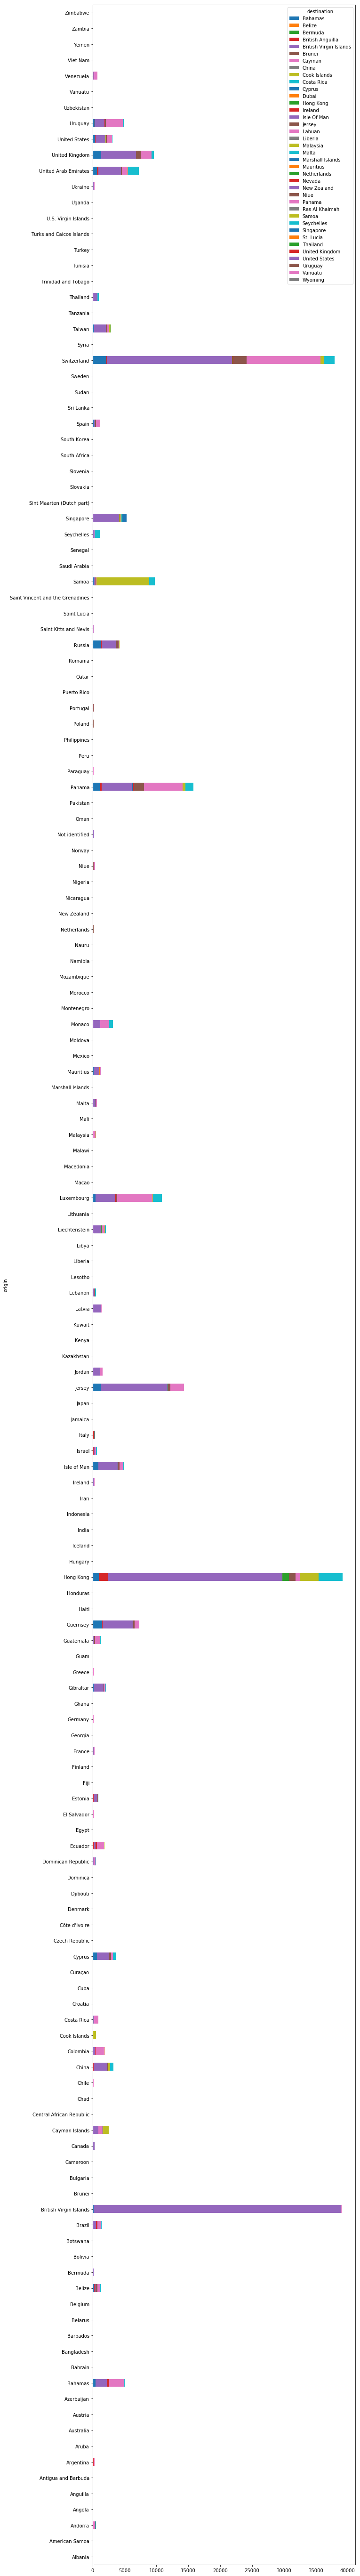

In [8]:
crosstable.plot.barh(stacked=True, figsize = [10, 100])

In [9]:
# TODO include migration flow chart and interpret result